![texto do link](https://www.unifacs.br/wp-content/uploads/2019/09/Imagem_Site_setembroamarelo-1620x1080.png)

---

# **SUICÍDIO NO BRASIL: ANÁLISE EXPLORATÓRIA DE DADOS**

---
---
Última atualização em 14 setembro de 2020

---

De acordo com a Organização Mundial da Saúde (OMS), a cada 40 segundos, uma pessoa comete suicídio no mundo. Já as tentativas de suicídio são estimadas em 20 vezes a de suicídios consumados, ou uma tentativa a cada 2 segundos.

Entre jovens de 15 a 19 anos, o suicídio aparece como segunda principal causa de mortes entre as meninas, após as complicações na gravidez, e a terceira entre meninos, depois de acidentes de trânsito e violência.

Este triste cenário registra cada vez mais casos, especialmente entre os jovens, e esses números alarmantes leva o suicídio a ser considerado um problema de saúde pública.

No Brasil, dados do ano de 2016 divulgados pela OMS, mostram que os a taxa de suicídios a cada 100 mil habitantes aumentou 7% no Brasil, ao contrário do índice mundial, que caiu 9,8%.

**Principais Fatores do Suicídio**

Segundo a OMS, conforme citado por Lovisi (2009), os principais fatores associados ao suicídio são:
* Tentativas anteriores de suicídio;
* Doenças mentais (principalmente depressão e abuso/dependência de álcool e drogas);
* Ausência de apoio social, histórico de suicídio na família;
* Eventos estressantes e características sociodemográficas.

**Quem está em Risco?**

Apesar da relação direta entre o distúrbios suicidas e transtornos mentais, em diversos casos os suicídios ocorrem de forma impulsiva em momento de crise, com um colapso na capacidade de lidar com os estresses da vida.

Além disso, de acordo com a Organização Pan-Americana da Saúde, as taxas de suicídio também são elevadas em grupos vulneráveis que sofrem discriminação, como refugiados e migrantes; indígenas; lésbicas, gays, bissexuais, transgêneros e intersexuais (LGBTI); e pessoas privadas de liberdade.

### **Proposta deste Projeto**

O objetivo deste trabalho é realizar análises exploratórias no conjunto de dados sobre suicídio, a fim de entender o comportamento dos dados em todo o mundo e, especialmente, no Brasil.

Escrevi o presente artigo na esperança de oferecer a minha pequena contribuição para ajudar nessa causa de tamanha importância e que requer a atenção e o engajamento de todos.

### **Obtenção dos Dados**

O conjunto de dados utilizado neste projeto está hospedado na plataforma Kaggle. Se trata de um dataset composto por dados sobre os casos de suicídios registrados entre os anos de 1985 a 2016.
Você pode conferir a descrição completa do conjunto de dados e baixá-lo clicando [aqui](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

In [1]:
# IMPORTAÇÃO DAS BIBLIOTECAS

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = 'dark')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# AQUISIÇÃO DOS DADOS

df = pd.read_csv('https://raw.githubusercontent.com/jeffersonverissimo/datasets/master/master.csv')

### **Análise Exploratória**

Apesar do dataset conter dados de vários países, o presente artigo irá focar na análise em relação ao Brasil e, em alguns casos, fazendo comparações com os demais países.

É importante ressaltar que o criador do conjunto de dados aplicou tratamentos que facilitará muito a exploração dos dados.
Algumas das informações que podem ser extraídas do dataset inicialmente são:

* Tamanho do conjunto de dados;
* Tipos de variáveis (categórica, numérica, etc);
* Valores ausentes;
* Distribuição estatística, etc;



In [3]:
# VISUALIZANDO AS PRIMEIRAS 5 LINHAS DO DATASET

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# RENOMEANDO AS COLUNAS

df = df.rename(columns = {'country':'country','year':'year','sex':'sex','age':'age',
                          'suicides_no':'suicides_no','population':'population',
                          'suicides/100k pop':'suicides_per_100k_hab','country-year':'country_year',
                          'HDI for year':'HDI_for_year',' gdp_for_year ($) ':'gdp_for_year_($)',
                          'gdp_per_capita ($)':'gdp_per_capita_($)','generation':'generation'})

**Para nos ajudar a compreender as informações contidas no dataset, é fundamental criarmos um dicionário de variáveis, apresentando a descrição de cada uma delas.**

**Dicionário de Variáveis**

* **country**: país onde os dados foram registrados (101 países)
* **year**: ano em que os dados foram registrados (1985–2016)
* **sex**: sexo considerado no registro
  * male - masculino
  * female - feminino
* **age**: faixa etária considerada
  * 5–14 anos
  * 15–24 anos
  * 25–34 anos
  * 35–54 anos
  * 55–74 anos
  * 75+ anos
* **suicides_no**: número de suicídios
* **population**: população para o grupo
* **suicides/100k pop**: número de suicídios por 100 mil habitantes
* **country_year**: identificador contendo country + year
* **HDI for year**: Índice de Desenvolvimento Humano (IDH) para o ano
* **gdp_for_year**: Produto Interno Bruto (PIB) para o ano
* **gdp_per_capita**: Produto Interno Bruto (PIB) per capita

**A partir do conhecimento inicial do *dataset*, podemos extratir algumas informações básicas desse conjunto de dados.**

In [6]:
# TAMANHO DO CONJUNTO DE DADOS

df.shape

(27820, 12)

In [7]:
# TIPOS DAS VARIÁVEIS

df.dtypes

country                   object
year                       int64
sex                       object
age                       object
suicides_no                int64
population                 int64
suicides_per_100k_hab    float64
country_year              object
HDI_for_year             float64
gdp_for_year_($)          object
gdp_per_capita_($)         int64
generation                object
dtype: object

In [8]:
# VALORES AUSENTES

((df.isnull().sum() / df.shape[0])*100).sort_values(ascending = False)

HDI_for_year             69.935298
generation                0.000000
gdp_per_capita_($)        0.000000
gdp_for_year_($)          0.000000
country_year              0.000000
suicides_per_100k_hab     0.000000
population                0.000000
suicides_no               0.000000
age                       0.000000
sex                       0.000000
year                      0.000000
country                   0.000000
dtype: float64

In [9]:
df.describe()

,year,suicides_no,population,suicides_per_100k_hab,HDI_for_year,gdp_per_capita_($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


**Visão Global**

Antes de iniciar de fato as análises sobre os dados do Brasil, precisamos ter uma visão do comportamento dos dados no restante do mundo. Para isso, podemos gerar alguns gráficos.

Vamos descobrir quais países apresentam os maiores números de casos de suicídios em todo o mundo no período de 1985 até 2015.

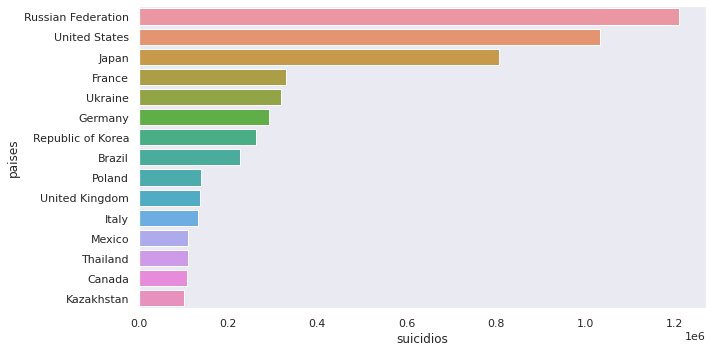

In [10]:
# PAÍSES COM MAIORES NÚMEROS DE SUICÍDIOS POR 100 MIL HABITANTES

suicidios = []
for paises in df.country.unique():
    suicidios.append(sum(df[df['country'] == paises].suicides_no))

suicidios = pd.DataFrame(suicidios, columns = ['suicidios'])
paises = pd.DataFrame(df.country.unique(), columns=['paises'])
num_suicidio = pd.concat([suicidios, paises], axis = 1)

num_suicidio = num_suicidio.sort_values(by = 'suicidios', ascending = False)

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(y = num_suicidio.paises[:15], x = num_suicidio.suicidios[:15])

plt.tight_layout()

Os números mais impressionantes são os da Rússia, Estados Unidos da América e Japão, que apresentam, pelo menos, duas vezes mais casos de suicídios do que o restante dos países listados. O Brasil aparece na lista como o 8º país com mais casos no período analisado.

Sabemos que existem diversas gerações entre as populações mundiais, elas são divididas de acordo com a média de idade de cada grupo. Como será que o comportamento dos dados sobre os casos de suicídios entre essas gerações?

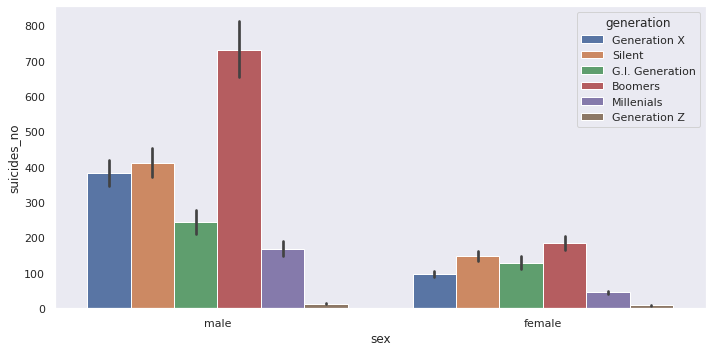

In [11]:
# TENDÊNCIA DE SUICÍDIO POR GERAÇÃO DA POPULAÇÃO

fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation', data = df)

plt.tight_layout()

O gráfico acima mostra os números de suicídios para cada geração divididas por sexo. Nos dois casos, tanto entre os homens quanto mulheres, a geração que apresenta maior número de casos de suicídio é a Boomers. Este grupo da população corresponde àquelas pessoas que nasceram logo após a Segunda Guerra Mundial, até a metade de 1960. Enquanto a Geração Z, nascidos entre 2001 e 2010, apresentam o menor número de casos.

### **Dados do Brasil**

Como o objetivo é estudar os dados em relação ao Brasil, será criado um novo conjunto de dados contendo informação apenas referente a esse país.
O novo dataset apenas com os dados do Brasil possui **372 linhas e 12 colunas**.
Existem dados faltantes nos dados referentes ao Brasil?

In [12]:
# DATASET COM DADOS SOBRE O BRASIL

df_brasil = df[df.country == 'Brazil'].copy()

df_brasil.head()

,country,year,sex,age,suicides_no,population,suicides_per_100k_hab,country_year,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


**Existem dados faltantes nos dados referentes ao Brasil?**

In [13]:
((df_brasil.isnull().sum() / df_brasil.shape[0])*100).sort_values(ascending = False)

HDI_for_year             67.741935
generation                0.000000
gdp_per_capita_($)        0.000000
gdp_for_year_($)          0.000000
country_year              0.000000
suicides_per_100k_hab     0.000000
population                0.000000
suicides_no               0.000000
age                       0.000000
sex                       0.000000
year                      0.000000
country                   0.000000
dtype: float64

Assim como no dataset geral, para o Brasil só existem valores ausentes na variável HDI for year. Contudo, corresponde a quase 68% das entradas dessa variável, ou seja, 252 valores faltantes.
Apesar disso, a ausência desses dados não irão interferir muito das análises propostas neste projeto.

**Taxa de Suicídio no Brasil**

A primeira análise a ser realizada será comparar a tendência da taxa de suicídio no Brasil com os demais países.

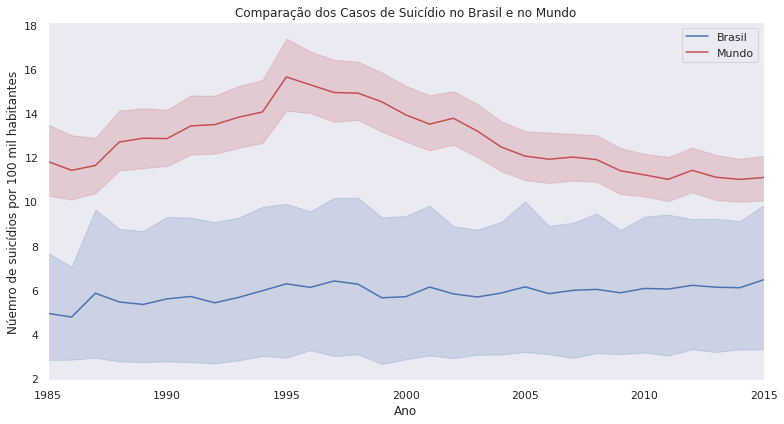

In [14]:
# COMPARAÇÃO DOS CASOS DE SUICÍDIO: BRASIL - MUNDO

fig, ax = plt.subplots(figsize = (11,6))

ax = sns.lineplot(x = df_brasil['year'], y = df_brasil['suicides_per_100k_hab'], color = 'b', label = 'Brasil')
ax = sns.lineplot(x = df['year'],  y = df['suicides_per_100k_hab'], color = 'r', label = 'Mundo')

plt.title('Comparação dos Casos de Suicídio no Brasil e no Mundo')
plt.xlabel('Ano')
plt.ylabel('Núemro de suicídios por 100 mil habitantes')
plt.xlim(1985, 2015)

plt.tight_layout()

No gráfico acima podemos observar que apesar da taxa de suicídio no Brasil ser bem inferior ao da restante do mundo, os números ainda são preocupantes, pois a taxa do Brasil praticamente só teve aumento durante 30 anos, enquanto a taxa mundial diminuiu a partir de 1995.

**Faixa Etária com Maior Índice de Suicídio**

Através de um gráfico de barras, fica fácil visualizar quais faixas etárias estão sendo mais afetadas com o problema de suicídio no Brasil. Foram analisadas 6 faixas de idade.

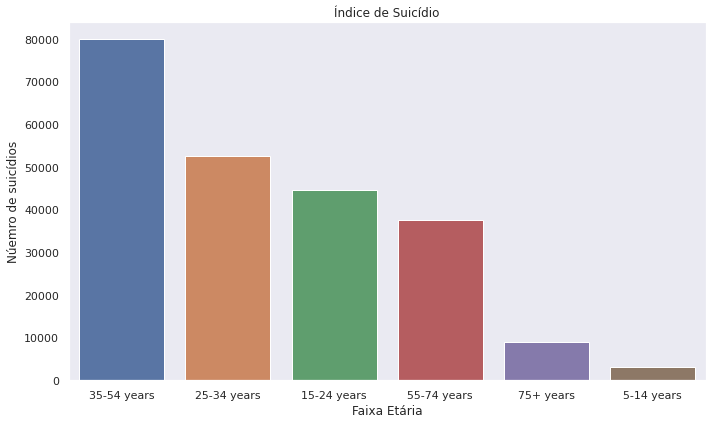

In [15]:
# ÍNDICE DE SUICÍDIO POR FAIXA ETÁRIA

idade = df_brasil.groupby('age')['suicides_no'].sum().sort_values(ascending = False)
eixox = idade.index

plt.figure(figsize = (10,6))
sns.barplot(x = eixox, y = idade)
plt.title('Índice de Suicídio')
plt.xlabel('Faixa Etária')
plt.ylabel('Núemro de suicídios')

plt.tight_layout()

Acima, podemos facilmente identificar que o grupo de pessoas que mais cometem suicídio é composto por pessoas cuja idade varia entre 35 e 54 anos. Em seguida, aparecem as pessoas com idades entre 25 e 34 anos.

Juntos, esses dois grupos correspondem a quase 60% de todos os casos de suicídio no país.

**Taxa de Suicídio entre Homens e Mulheres**

Esta análise é fundamental, pois podemos verificar qual dos sexos está sendo mais afetado com esse problema de saúde pública, homens ou mulheres.

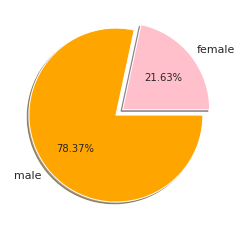

In [16]:
# GRÁFICO DE PIZZA: TAXA DE SUICÍDIO ENTRE HOMENS E MULHERES

genero = df_brasil.groupby('sex')['suicides_no'].sum()

plt.pie(genero, labels = genero.index,autopct='%.2f%%', shadow=True, colors = ['pink', 'orange'], explode=[0.1, 0]);

Observando o gráfico acima, podemos identificar facilmente que a taxa de suicídio é muito maior entre os **homens**, correspondendo a cerca de **78%**, enquanto as **mulheres** correspondem a **22%**.

**A Contribuição da Ciência de Dados na Prevenção do Suicídio**

Em 2013, o Brasil começou a fazer parte do "Plano de Ação sobre Saúde Mental 2013–2020", feito pela Organização Mundial da Saúde, cujo objetivo era promover a redução da taxa de suicídio em 10% até o ano de 2020. Contudo, as pesquisas indicam que a taxa de suicídio aumentou, o que preocupa muito governo.

Diversas iniciativas estão sendo tomadas por algumas empresas do setor de tecnologia, especialmente com o uso de Inteligência Artificial, analisando padrões de escrita em redes sociais e ajudar a prever possíveis casos de suicídio. Contudo, a IA se aplica em várias outras situações que contribuem para a prevenção do suicídio.

Vale ressaltar que o conjunto de dados utilizado no presente artigo é relativamente pequeno e simples, mas que serve muito bem para o objetivo proposto e realizar análises iniciais.

**Necessita de Ajuda? Ligue para 188**

No Brasil, o CVV - Centro de Valorização da Vida realiza apoio emocional e prevenção do suicídio, atendendo voluntária e gratuitamente todas as pessoas que querem e precisam conversar, sob total sigilo, por telefone (basta discar 188), e-mail e chat 24 horas todos os dias.

### **Acha que este artigo e conteúdo pode ajudar outras pessoas? Sinta-se à vontade para compartilhá-lo.**